In [18]:
%load_ext autoreload
%autoreload 2

from datetime import datetime

import dask.array as da
import matplotlib.pyplot as plt

from wasserstand.config import DATAFILE_TEMPLATE
from wasserstand.dataset import build_time_series, load_data_range
from wasserstand.models.high_level_predictor import HighLevelPredictor
from wasserstand.models.univariate import UnivariatePredictor
from wasserstand.models.mean import MeanPredictor
from wasserstand.models.time_series_differentiator import TimeSeriesDifferentiator
from wasserstand.models.uvar import UnivariateAR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
training_data = build_time_series(
    load_data_range(datetime(2021, 10, 10), datetime(2021, 11, 1), DATAFILE_TEMPLATE)
)

testing_data = build_time_series(
    load_data_range(datetime(2021, 11, 1), datetime(2021, 11, 5), DATAFILE_TEMPLATE)
)

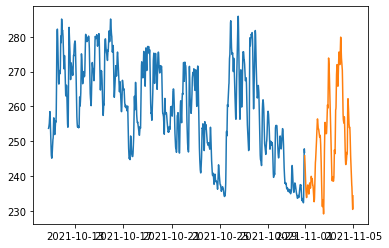

In [100]:
plt.plot(training_data.time, training_data.sel(station="Innsbruck"))
plt.plot(testing_data.time, testing_data.sel(station="Innsbruck"))

In [101]:
#model = HighLevelPredictor(UnivariatePredictor(4, 1e-3, 1e-6))
#model = HighLevelPredictor(UnivariateAR(5, 1e-3))
model = HighLevelPredictor(TimeSeriesDifferentiator(UnivariateAR(5, 1e-6)))
model.fit(training_data)

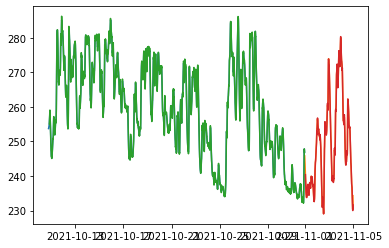

In [102]:
plt.plot(training_data.time, training_data.sel(station="Innsbruck"))
plt.plot(testing_data.time, testing_data.sel(station="Innsbruck"))

pred = model.predict_series(training_data)
plt.plot(pred.time, pred.sel(station="Innsbruck"))

pred = model.predict_series(testing_data)
plt.plot(pred.time, pred.sel(station="Innsbruck"))

0.31352894975760826
0.2909817083757083


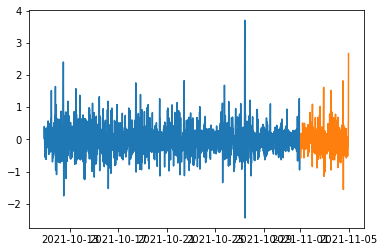

In [103]:
pred = model.predict_series(training_data)
r = (training_data - pred).sel(station="Innsbruck")
plt.plot(r.time, r)
print(da.mean(da.fabs(r)).compute())

pred = model.predict_series(testing_data)
r = (testing_data - pred).sel(station="Innsbruck")
plt.plot(r.time, r)
print(da.mean(da.fabs(r)).compute())